# Data Analytics Exam

__Group participants:__ Artem Makoyan, Nikita Ivlev, Veronika Sirotkina

## 1. Load and preprocess data

In [15]:
import pandas as pd

# Load datasets
airlines = pd.read_csv('Data/airlines.csv', delimiter=';', quotechar='"', na_values='NA')
airports = pd.read_csv('Data/airports.csv', delimiter=';', quotechar='"', na_values='NA')
flights = pd.read_csv('Data/flights.csv', delimiter=';', quotechar='"', na_values='NA')
planes = pd.read_csv('Data/planes.csv', delimiter=';', quotechar='"', na_values='NA')
weather = pd.read_csv('Data/weather.csv', delimiter=';', quotechar='"', na_values='NA')

# Display basic information about the datasets
print("Airlines shape:", airlines.shape)
print("Airports shape:", airports.shape)
print("Flights shape:", flights.shape)
print("Planes shape:", planes.shape)
print("Weather shape:", weather.shape)

Airlines shape: (14, 3)
Airports shape: (1251, 9)
Flights shape: (435352, 20)
Planes shape: (4840, 10)
Weather shape: (26204, 16)


In [16]:
def clean_airports(df):
    # Drop rows with missing data since there is little of them
    df = df.dropna()
    df['faa'] = df['faa'].astype(str)
    df['name'] = df['name'].astype(str)
    df['lat'] = df['lat'].astype(str).str.replace(',', '.').astype(float)
    df['lon'] = df['lon'].astype(str).str.replace(',', '.').astype(float)
    df['alt'] = df['alt'].astype(str).str.replace(',', '.').astype(float)
    df['tz'] = df['tz'].astype(int)
    df['dst'] = df['dst'].astype(str)
    df['tzone'] = df['tzone'].astype(str)
    return df


def clean_flights(df):
    df = df.dropna()
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    df['day'] = df['day'].astype(int)
    df['sched_dep_time'] = df['sched_dep_time'].astype(int)
    df['dep_delay'] = df['dep_delay'].astype(int)
    df['sched_arr_time'] = df['sched_arr_time'].astype(int)
    df['arr_delay'] = df['arr_delay'].astype(int)

    # Data in dep_time and arr_time is corrupted due to not taking into account departing/arriving on the next day
    df['dep_time'] = df['sched_dep_time'] + df['dep_delay']
    df['arr_time'] = df['sched_arr_time'] + df['arr_delay']

    df['carrier'] = df['carrier'].astype(str)
    df['flight'] = df['flight'].astype(int)
    df['tailnum'] = df['tailnum'].astype(str)
    df['origin'] = df['origin'].astype(str)
    df['dest'] = df['dest'].astype(str)
    df['air_time'] = df['air_time'].astype(str).str.replace(',', '.').astype(float)
    df['distance'] = df['distance'].astype(str).str.replace(',', '.').astype(float)
    df['hour'] = df['hour'].astype(int)
    df['minute'] = df['minute'].astype(int)
    df['time_hour'] = pd.to_datetime(df['time_hour'])
    return df


def clean_planes(df):
    df = df.dropna()
    df['tailnum'] = df['tailnum'].astype(str)
    df['year'] = df['year'].astype(int)
    df['type'] = df['type'].astype(str)
    df['manufacturer'] = df['manufacturer'].astype(str)
    df['model'] = df['model'].astype(str)
    df['engines'] = df['engines'].astype(int)
    df['seats'] = df['seats'].astype(int)
    df['speed'] = df['speed'].astype(str).str.replace(',', '.').astype(float)
    df['engine'] = df['engine'].astype(str)
    return df


def clean_weather(df):
    # These columns are almost completely filled with NA.
    # The number of non-NA fields is too small to conclude anything, so we are dropping them
    df = df.drop(columns=['temp', 'dewp', 'humid', 'precip', 'pressure'])

    df = df.dropna()
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    df['day'] = df['day'].astype(int)
    df['hour'] = df['hour'].astype(int)
    df['wind_dir'] = df['wind_dir'].astype(int)
    df['wind_speed'] = df['wind_speed'].astype(str).str.replace(',', '.').astype(float)
    df['wind_gust'] = df['wind_gust'].astype(str).str.replace(',', '.').astype(float)
    df['visib'] = df['visib'].astype(str).str.replace(',', '.').astype(float)
    df['time_hour'] = pd.to_datetime(df['time_hour'], errors='coerce')
    return df

In [17]:
airports_cleaned = clean_airports(airports)
flights_cleaned = clean_flights(flights)
planes_cleaned = clean_planes(planes)
weather_cleaned = clean_weather(weather)

tables = {"Airports": (airports, airports_cleaned), "Flights": (flights, flights_cleaned),
          "Planes": (planes, planes_cleaned), "Weather": (weather, weather_cleaned)}
for name, table in tables.items():
    print(f"{name} before cleaning:")
    print(table[0].info(), end="\n")
    print(f"{name} after cleaning:")
    print(table[1].info(), end="\n")

/var/folders/9t/vjq4j3q90k72gcsgrs8j6wj00000gp/T/ipykernel_59250/2950023943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['faa'] = df['faa'].astype(str)
/var/folders/9t/vjq4j3q90k72gcsgrs8j6wj00000gp/T/ipykernel_59250/2950023943.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].astype(str)
/var/folders/9t/vjq4j3q90k72gcsgrs8j6wj00000gp/T/ipykernel_59250/2950023943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

Airports before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1251 non-null   int64  
 1   faa         1251 non-null   object 
 2   name        1251 non-null   object 
 3   lat         1251 non-null   object 
 4   lon         1251 non-null   object 
 5   alt         1251 non-null   int64  
 6   tz          1203 non-null   float64
 7   dst         1203 non-null   object 
 8   tzone       1132 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 88.1+ KB
None
Airports after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 1132 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1132 non-null   int64  
 1   faa         1132 non-null   object 
 2   name        1132 non-null   object 
 3   lat         1

## 2. Explore table data

Summary for Airports:
         Unnamed: 0   faa                  name          lat          lon  \
count   1132.000000  1132                  1132  1132.000000  1132.000000   
unique          NaN  1132                  1129          NaN          NaN   
top             NaN   AAF  Capital City Airport          NaN          NaN   
freq            NaN     1                     3          NaN          NaN   
mean     625.319788   NaN                   NaN    41.187758  -104.025646   
std      358.631972   NaN                   NaN    10.445591    28.629499   
min        1.000000   NaN                   NaN    19.721399  -176.645996   
25%      316.750000   NaN                   NaN    34.114076  -118.409248   
50%      625.500000   NaN                   NaN    39.548199   -96.291199   
75%      932.250000   NaN                   NaN    44.554000   -82.918827   
max     1250.000000   NaN                   NaN    71.285402   174.113998   

                alt           tz   dst             tz

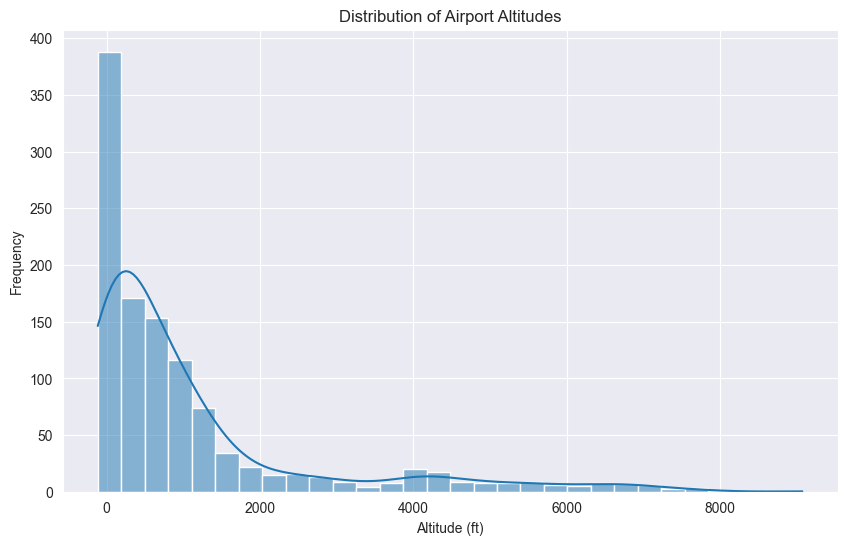

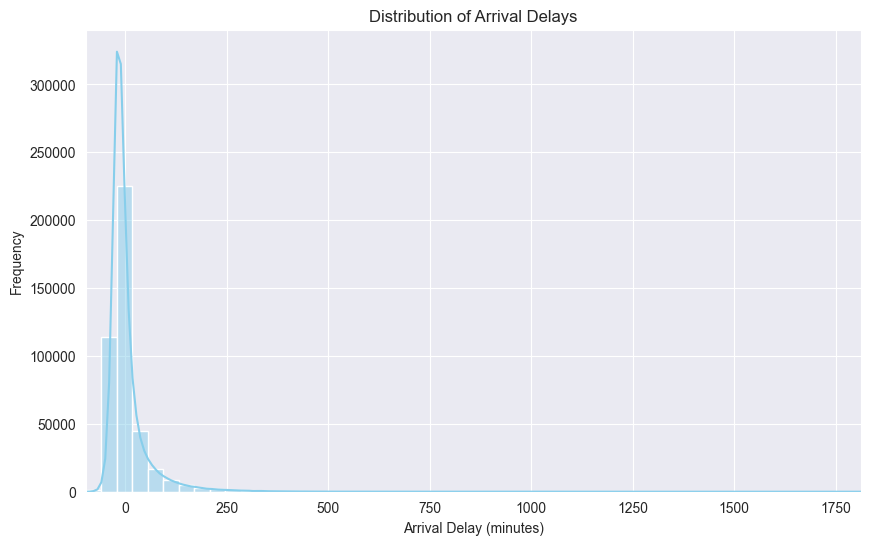

/var/folders/9t/vjq4j3q90k72gcsgrs8j6wj00000gp/T/ipykernel_59250/1068777808.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=flights_cleaned, x='month', y='arr_delay', palette='coolwarm')


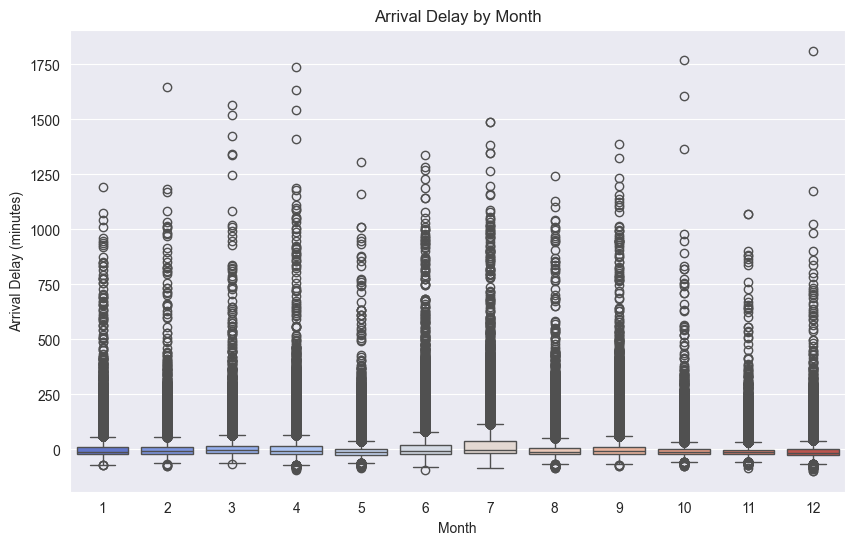

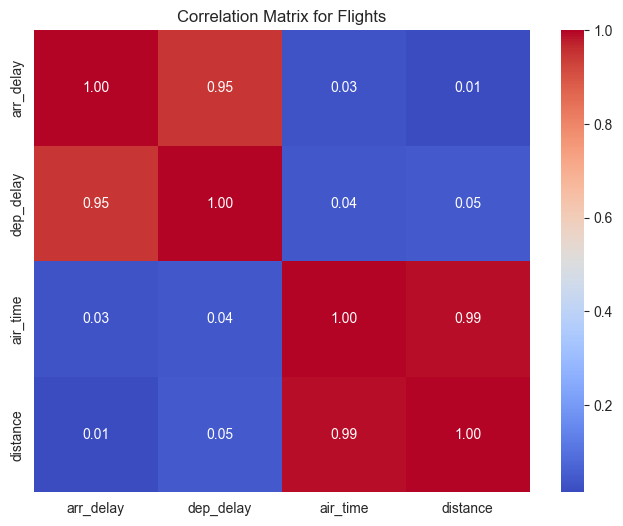

/var/folders/9t/vjq4j3q90k72gcsgrs8j6wj00000gp/T/ipykernel_59250/1068777808.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=planes_cleaned, x='year', palette='viridis')


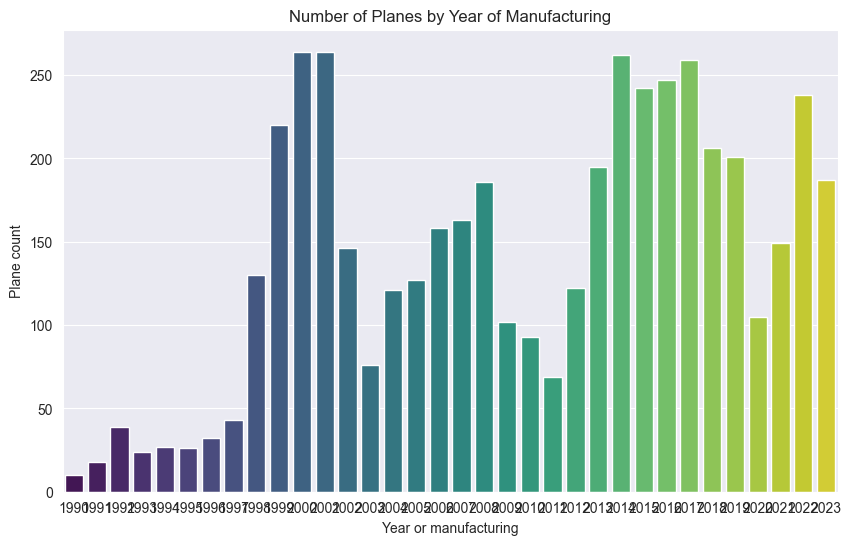

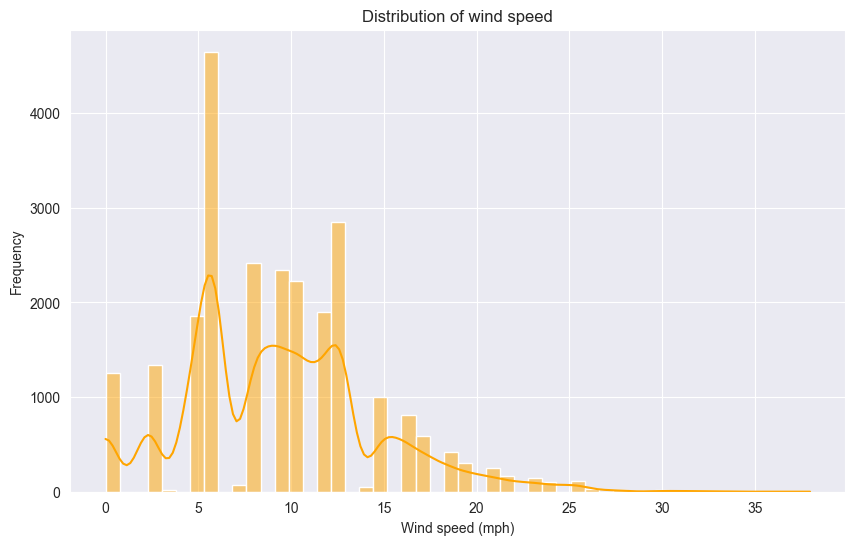

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


def dataset_summary(df, name):
    print(f"Summary for {name}:")
    print(df.describe(include='all'))
    print("-" * 50)


dataset_summary(airports_cleaned, "Airports")
dataset_summary(flights_cleaned, "Flights")
dataset_summary(planes_cleaned, "Planes")
dataset_summary(weather_cleaned, "Weather")

# Airports dataset
plt.figure(figsize=(10, 6))
sns.histplot(airports_cleaned['alt'], kde=True, bins=30)
plt.title("Distribution of Airport Altitudes")
plt.xlabel("Altitude (ft)")
plt.ylabel("Frequency")
plt.show()

# Flights dataset
plt.figure(figsize=(10, 6))
sns.histplot(flights_cleaned['arr_delay'], kde=True, bins=50, color='skyblue')
plt.title("Distribution of Arrival Delays")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.xlim(flights_cleaned['arr_delay'].min(), flights_cleaned['arr_delay'].max())
plt.show()
# Explore flights delay trends by month
plt.figure(figsize=(10, 6))
sns.boxplot(data=flights_cleaned, x='month', y='arr_delay', palette='coolwarm')
plt.title("Arrival Delay by Month")
plt.xlabel("Month")
plt.ylabel("Arrival Delay (minutes)")
plt.show()
# Correlation between distance and delays for Flights
corr = flights_cleaned[['arr_delay', 'dep_delay', 'air_time', 'distance']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Flights")
plt.show()

# Planes dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=planes_cleaned, x='year', palette='viridis')
plt.title("Number of Planes by Year of Manufacturing")
plt.xlabel("Year or manufacturing")
plt.ylabel("Plane count")
plt.show()

# Weather dataset
plt.figure(figsize=(10, 6))
sns.histplot(weather_cleaned['wind_speed'], kde=True, bins=50, color='orange')
plt.title("Distribution of wind speed")
plt.xlabel("Wind speed (mph)")
plt.ylabel("Frequency")
plt.show()

## 3.1 Preprocess data to predict month of the year by weather

In [19]:
# Features and target
X = weather_cleaned[['wind_dir', 'wind_speed', 'wind_gust', 'visib']]
y = weather_cleaned['month']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4.1 Train a model to predict month of the year by weather

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
logistic_model = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Results:
              precision    recall  f1-score   support

           1       0.09      0.13      0.11       409
           2       0.00      0.00      0.00       386
           3       0.16      0.33      0.21       425
           4       0.19      0.12      0.15       445
           5       0.00      0.00      0.00       400
           6       0.15      0.02      0.04       438
           7       0.13      0.25      0.17       444
           8       0.14      0.39      0.21       407
           9       0.19      0.18      0.18       377
          10       0.00      0.00      0.00       461
          11       0.12      0.21      0.15       355
          12       0.25      0.10      0.15       448

    accuracy                           0.14      4995
   macro avg       0.12      0.14      0.11      4995
weighted avg       0.12      0.14      0.11      4995

Accuracy: 0.14314314314314314


/Users/Veronika.Sirotkina/PycharmProjects/DataAnalyticsProject/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/Veronika.Sirotkina/PycharmProjects/DataAnalyticsProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Veronika.Sirotkina/PycharmProjects/DataAnalyticsProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro


Random Forest Results:
              precision    recall  f1-score   support

           1       0.17      0.22      0.19       409
           2       0.17      0.09      0.12       386
           3       0.18      0.20      0.19       425
           4       0.23      0.11      0.14       445
           5       0.16      0.12      0.14       400
           6       0.23      0.19      0.21       438
           7       0.19      0.26      0.22       444
           8       0.15      0.17      0.16       407
           9       0.16      0.20      0.18       377
          10       0.14      0.20      0.17       461
          11       0.12      0.12      0.12       355
          12       0.17      0.13      0.15       448

    accuracy                           0.17      4995
   macro avg       0.17      0.17      0.17      4995
weighted avg       0.17      0.17      0.17      4995

Accuracy: 0.16956956956956956
